This is the notebook for the numerical experiments of the project **UMD-based extension of Adagrad-Norm and application to games**. I programmed DA and OMD with Euclidean regularizers and entropic regularizer (exponential weights algorithm). For each of them I visualized the evolution of the regret compared to the theoretical guarantee as a function of the horizon T and also the evolution of the iterates in the plane in the case of $d = 2$. I also ran simulations for the classical exponential weights algorithm and regret marching (RM and RM+).

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Euclidean regularizers

In [ ]:
d = 2
gamma = 1.0
x_ref = np.array([0.5, 0.5])

In [ ]:
# Euclidean projection onto the unit ball
def project_onto_ball(z, radius=1):
    norm_z = np.linalg.norm(z)
    if norm_z > radius:
        return (z / norm_z) * radius
    return z

## Euclidean DA

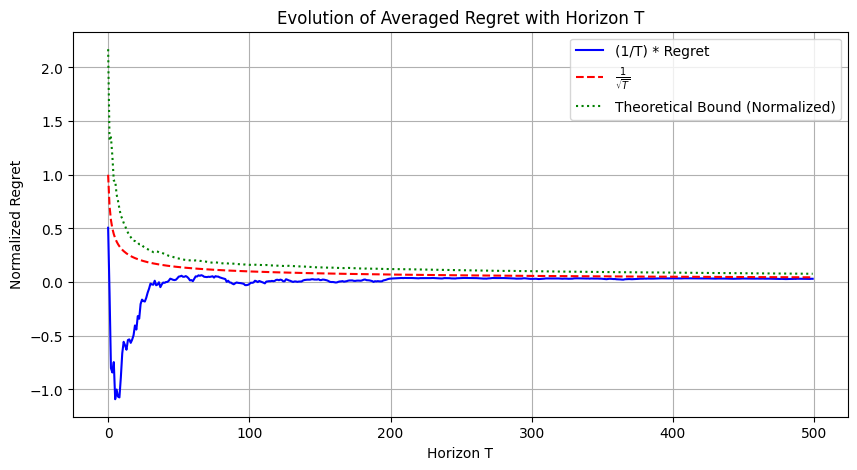

In [ ]:
T_max = 500

np.random.seed(1)
u_all = np.random.randn(T_max, d)

cumulative_regrets = np.zeros(T_max)
theoretical_bounds = np.zeros(T_max)

for T in range(1, T_max + 1):
    u = u_all[:T]
    x = np.zeros((T, d))
    y = np.zeros((T, d))
    z_t = np.zeros(d)
    cumulative_regret = 0

    sum_norms_u = np.sqrt(np.sum(np.linalg.norm(u, axis=1)**2))  # sum of norms of u_t up to T

    for t in range(T):
        gamma_t = gamma / np.sqrt(np.sum(np.linalg.norm(u[:t+1], axis=1)**2))
        x[t] = project_onto_ball(gamma_t * z_t)
        z_t = z_t + u[t]
        y[t] = z_t * gamma_t
        regret = np.dot(u[t], x_ref - x[t])
        cumulative_regret += regret

    cumulative_regrets[T-1] = cumulative_regret
    theoretical_bounds[T-1] = (np.linalg.norm(x_ref)**2 / (2 * gamma) + gamma) * sum_norms_u

# Calculate (1/T) * regret for each T
normalized_cumulative_regrets = cumulative_regrets / np.arange(1, T_max + 1)
sqrt_T_inv = 1 / np.sqrt(np.arange(1, T_max + 1))

plt.figure(figsize=(10, 5))
plt.plot(normalized_cumulative_regrets, label='(1/T) * Regret', color='blue')
plt.plot(sqrt_T_inv, label='$\\frac{1}{\\sqrt{T}}$', color='red', linestyle='--')
plt.plot(theoretical_bounds / np.arange(1, T_max + 1), label='Theoretical Bound (Normalized)', color='green', linestyle=':')
plt.title('Evolution of Averaged Regret with Horizon T')
plt.xlabel('Horizon T')
plt.ylabel('Normalized Regret')
plt.legend()
plt.grid(True)
plt.show()

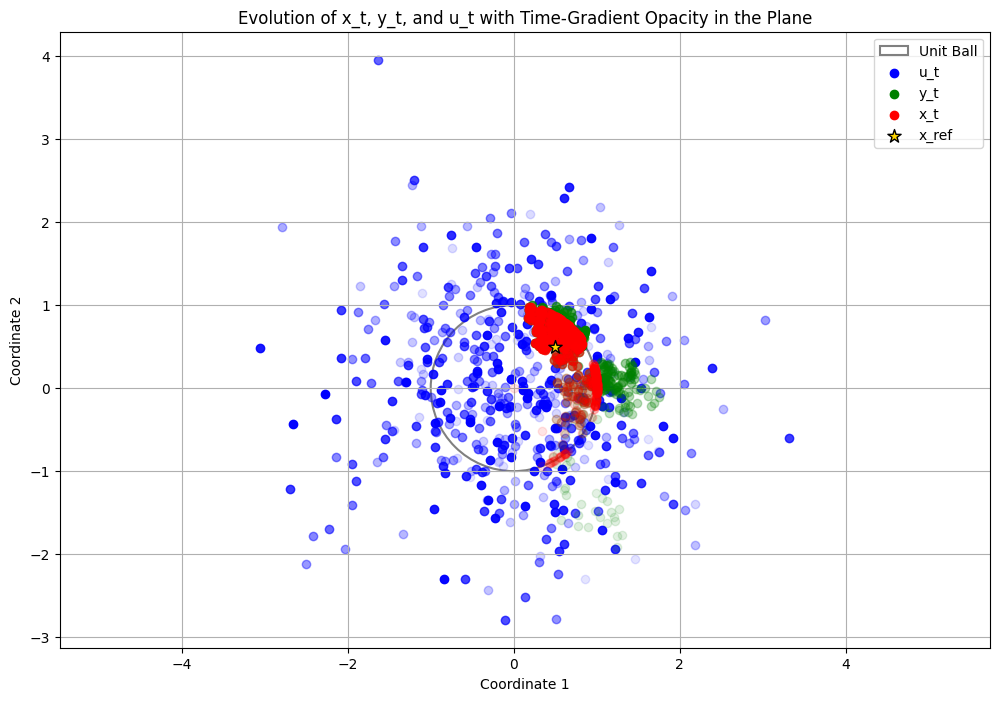

In [ ]:
plt.figure(figsize=(12, 8))

# Unit ball
circle = plt.Circle((0, 0), 1, color='gray', fill=False, linewidth=1.5, label='Unit Ball')
plt.gca().add_artist(circle)


num_points = T_max
opacities = np.linspace(0.1, 1, num_points)


for i in range(num_points):
    plt.scatter(u[i, 0], u[i, 1], color='blue', alpha=opacities[i], label='u_t' if i == T-1 else "", zorder=1)

for i in range(num_points):
    plt.scatter(y[i, 0], y[i, 1], color='green', alpha=opacities[i], label='y_t' if i == T-1 else "", zorder=2)

for i in range(num_points):
    plt.scatter(x[i, 0], x[i, 1], color='red', alpha=opacities[i], label='x_t' if i == T-1 else "", zorder=3)

plt.scatter(x_ref[0], x_ref[1], color='gold', s=100, edgecolors='black', label='x_ref', marker='*', zorder=4)

plt.title('Evolution of x_t, y_t, and u_t with Time-Gradient Opacity in the Plane')
plt.xlabel('Coordinate 1')
plt.ylabel('Coordinate 2')
plt.legend()
plt.axis('equal')
plt.grid(True)
plt.show()

## Euclidean OMD

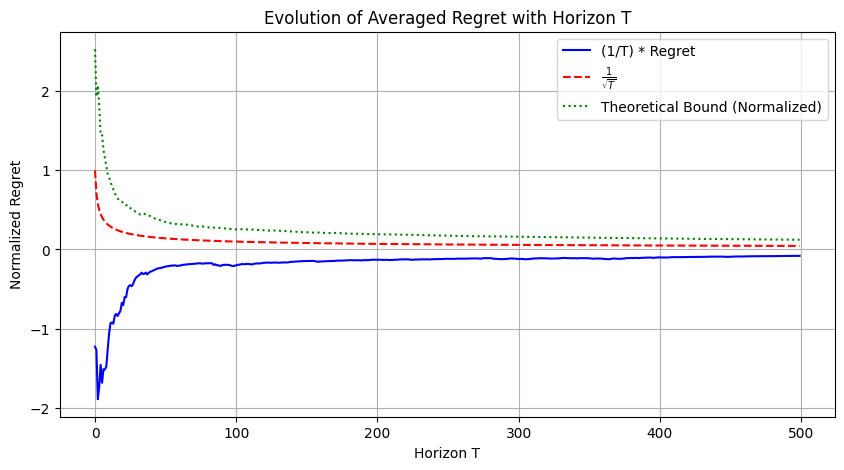

In [ ]:
T_max = 500

np.random.seed(1)
u_all = np.random.randn(T_max, d)

cumulative_regrets = np.zeros(T_max)
theoretical_bounds = np.zeros(T_max)

max_squared_distances = np.zeros(T_max)

for T in range(1, T_max + 1):
    u = u_all[:T]
    x = np.zeros((T + 1, d))
    cumulative_regret = 0
    max_squared_distance = 0

    for t in range(T):
        gamma_t = gamma / np.sqrt(np.sum(np.linalg.norm(u[:t+1], axis=1)**2))
        x[t+1] = project_onto_ball(x[t] + gamma_t * u[t])
        regret = np.dot(u[t], x_ref - x[t+1])
        cumulative_regret += regret
        squared_distance = np.linalg.norm(x_ref - x[t+1])**2
        if squared_distance > max_squared_distance:
            max_squared_distance = squared_distance

    cumulative_regrets[T-1] = cumulative_regret
    max_squared_distances[T-1] = max_squared_distance
    sum_norms_u = np.sqrt(np.sum(np.linalg.norm(u, axis=1)**2))
    theoretical_bounds[T-1] = (0.5 / gamma * max_squared_distances[T-1] + gamma) * sum_norms_u

normalized_cumulative_regrets = cumulative_regrets / np.arange(1, T_max + 1)
sqrt_T_inv = 1 / np.sqrt(np.arange(1, T_max + 1))

plt.figure(figsize=(10, 5))
plt.plot(normalized_cumulative_regrets, label='(1/T) * Regret', color='blue')
plt.plot(sqrt_T_inv, label='$\\frac{1}{\\sqrt{T}}$', color='red', linestyle='--')
plt.plot(theoretical_bounds / np.arange(1, T_max + 1), label='Theoretical Bound (Normalized)', color='green', linestyle=':')
plt.title('Evolution of Averaged Regret with Horizon T')
plt.xlabel('Horizon T')
plt.ylabel('Normalized Regret')
plt.legend()
plt.grid(True)
plt.show()

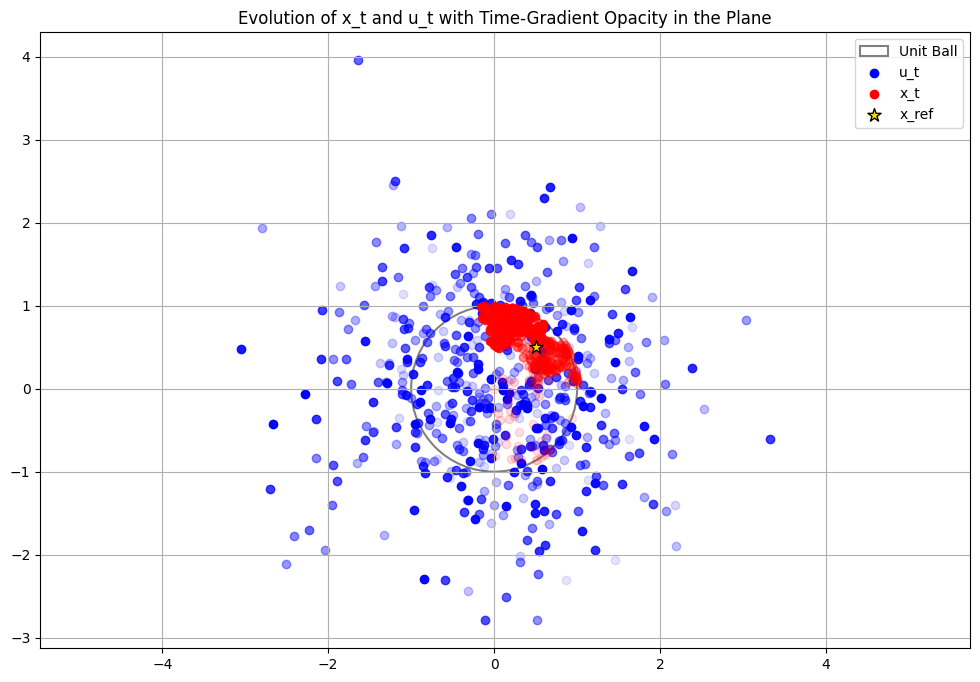

In [ ]:
plt.figure(figsize=(12, 8))

circle = plt.Circle((0, 0), 1, color='gray', fill=False, linewidth=1.5, label='Unit Ball')
plt.gca().add_artist(circle)

num_points = T_max

opacities = np.linspace(0.1, 1, num_points)

for i in range(num_points):
    plt.scatter(u_all[i, 0], u_all[i, 1], color='blue', alpha=opacities[i], label='u_t' if i == T_max-1 else "", zorder=1)

for i in range(num_points):
    plt.scatter(x[i, 0], x[i, 1], color='red', alpha=opacities[i], label='x_t' if i == T_max-1 else "", zorder=3)

plt.scatter(x_ref[0], x_ref[1], color='gold', s=100, edgecolors='black', label='x_ref', marker='*', zorder=4)

plt.title('Evolution of x_t and u_t with Time-Gradient Opacity in the Plane')
plt.xlabel('')
plt.ylabel('')
plt.legend()
plt.axis('equal')
plt.grid(True)
plt.show()

#Entropic regularizer

In [ ]:
d = 2
T_max = 500
gamma = 1.0

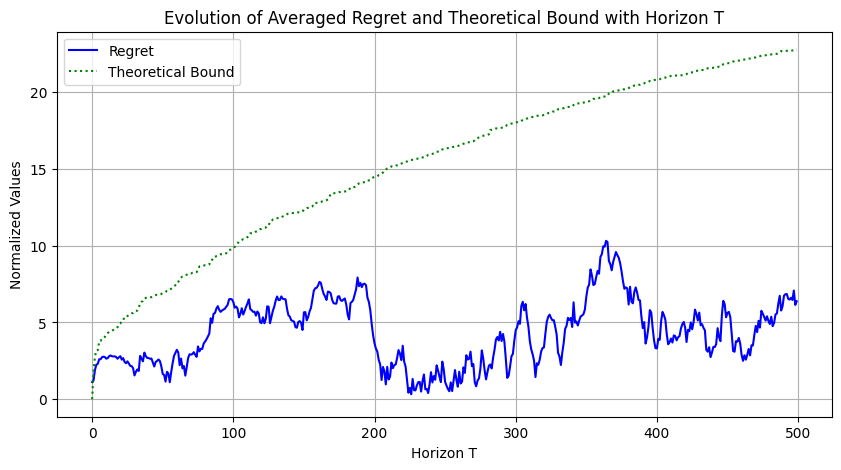

In [ ]:
np.random.seed(1)
u_all = np.random.randn(T_max, d)

def h_ent(x):
    """ Negative entropy on the simplex. """
    return np.sum(x * np.log(x))

def logsumexp(u):
    """ Convex conjugate of negative entropy, which is log-sum-exp. """
    return np.log(np.sum(np.exp(u)))

def softmax(u):
    """Softmax function, gradient of log-sum-exp."""
    e_u = np.exp(u)
    return e_u / e_u.sum(axis=0)

def bregman_divergence(u, v):
    """ Bregman divergence for h*_ent. """
    return logsumexp(u) - logsumexp(v) - np.dot(softmax(v), u - v)

# Initialization
x = np.zeros((T_max + 1, d))
y = np.zeros((T_max + 1 , d))
x[0, :] = np.ones(d) / d # x_0 is initialized in the simplex (uniformly)
regrets = np.zeros(T_max)
theoretical_bounds = np.zeros(T_max)

# Run
for T in range(1, T_max + 1):
    u = u_all[:T]  # Use the first T elements of the dual iterates
    sum_ut = np.zeros(d)  # Cumulative sum of u_t
    gamma_values = np.zeros(T)
    sum_xu = 0
    for t in range(T):
        gamma_t = gamma / np.sqrt(np.sum(np.linalg.norm(u[:t+1], axis=1)**2))
        gamma_values[t] = gamma_t
        sum_ut += u[t]
        x[t + 1] = softmax(gamma_t * sum_ut)
        y[t + 1] = y[t] + gamma_t*u[t]
        sum_xu += np.dot(u[t], x[t])

    regret = max(np.sum(u[:T], axis=0)) - sum_xu
    regrets[T-1] = regret
    if T > 1:
        theoretical_bounds[T-1] = np.log(d) / gamma_values[T-1] + np.sum([bregman_divergence(y[t+1], y[t]) / gamma_values[t] for t in range(T)])


plt.figure(figsize=(10, 5))
plt.plot(regrets, label='Regret', color='blue')
plt.plot(theoretical_bounds, label='Theoretical Bound', color='green', linestyle=':')
plt.title('Evolution of Averaged Regret and Theoretical Bound with Horizon T')
plt.xlabel('Horizon T')
plt.ylabel('Normalized Values')
plt.legend()
plt.grid(True)
plt.show()

<ipython-input-88-24613e7df063>:11: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  triangle = plt.Polygon(vertices, closed=True, color='orange', fill=None, edgecolor='orange', linewidth=1.5, label='Simplex')


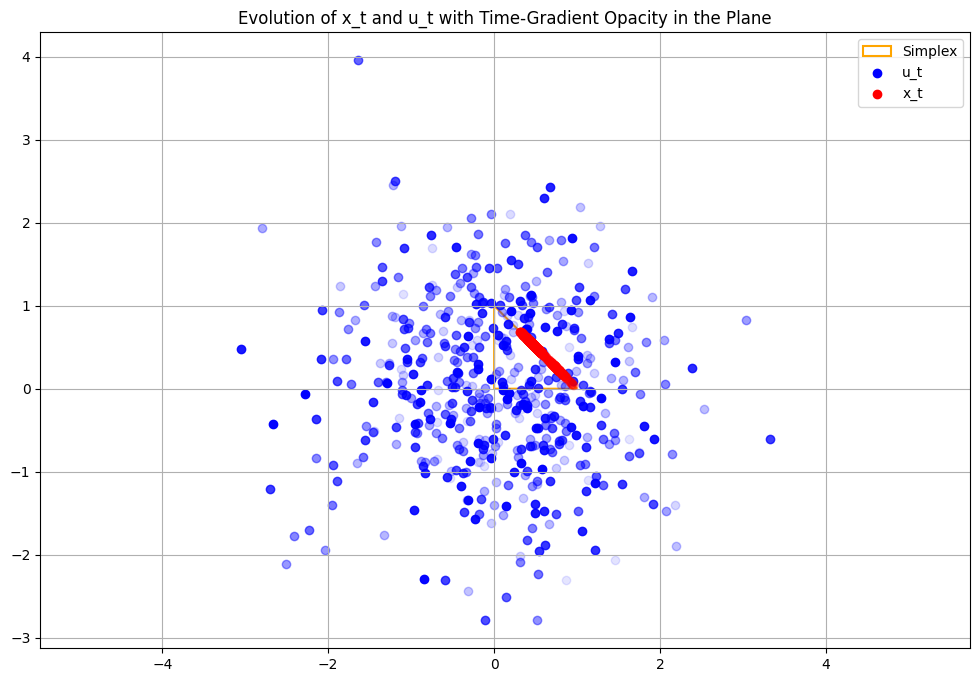

In [ ]:

plt.figure(figsize=(12, 8))


# Plot the simplex

vertices = np.array([[0, 0], [1, 0], [0, 1]])
triangle = plt.Polygon(vertices, closed=True, color='orange', fill=None, edgecolor='orange', linewidth=1.5, label='Simplex')
plt.gca().add_artist(triangle)

num_points = T_max
opacities = np.linspace(0.1, 1, num_points)

for i in range(num_points):
    plt.scatter(u_all[i, 0], u_all[i, 1], color='blue', alpha=opacities[i], label='u_t' if i == T_max-1 else "", zorder=1)

for i in range(num_points):
    plt.scatter(x[i, 0], x[i, 1], color='red', alpha=opacities[i], label='x_t' if i == T_max-1 else "", zorder=3)

plt.title('Evolution of x_t and u_t with Time-Gradient Opacity in the Plane')
plt.xlabel('')
plt.ylabel('')
plt.legend()
plt.axis('equal')
plt.grid(True)
plt.show()


# Classical exponential weights

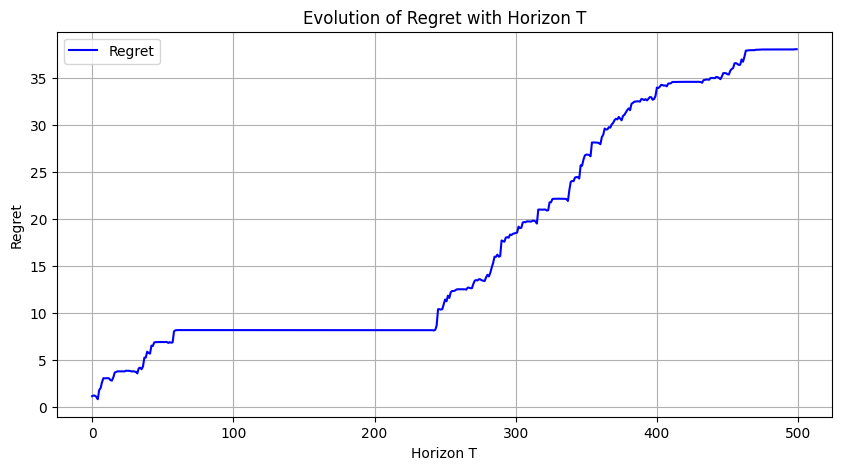

In [ ]:
u_all = np.random.randn(T_max, d)


def softmax(u):
    """Softmax function, gradient of log-sum-exp."""
    e_u = np.exp(u)
    return e_u / e_u.sum(axis=0)

# Initialize arrays
x = np.zeros((T_max + 1, d))  # x_0 is initialized in the simplex (uniformly)
x[0, :] = np.ones(d) / d
regrets = np.zeros(T_max)

# Main loop
for T in range(1, T_max + 1):
    u = u_all[:T]  # First T dual iterates
    sum_ut = np.zeros(d)  # Cumulative sum of u_t
    sum_xu = 0
    for t in range(T):
        sum_ut += u[t]
        x[t + 1] = softmax(sum_ut)
        sum_xu += np.dot(u[t], x[t])

    regret = max(np.sum(u[:T], axis=0)) - sum_xu
    regrets[T-1] = regret

# Plotting
plt.figure(figsize=(10, 5))
plt.plot(regrets, label='Regret', color='blue')
plt.title('Evolution of Regret with Horizon T')
plt.xlabel('Horizon T')
plt.ylabel('Regret')
plt.legend()
plt.grid(True)
plt.show()

# Regret matching

## RM

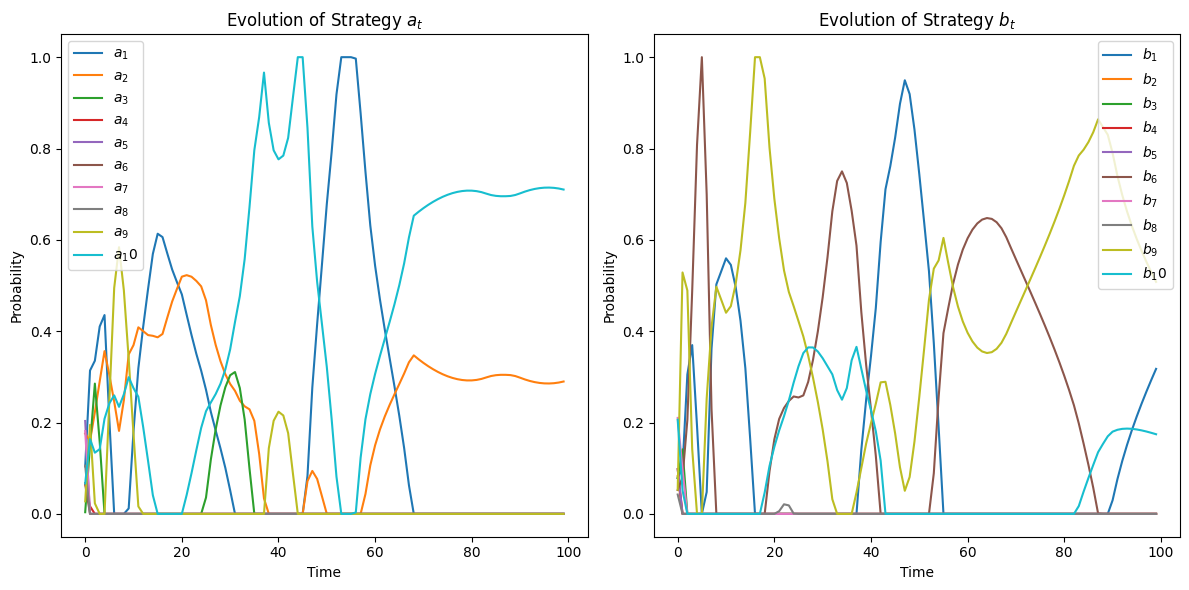

In [ ]:
T_max = 100
n = 10  # Dimension of the game

np.random.seed(0)
A = np.random.randn(n, n)  # Payoff matrix

# Initializion of strategies in the simplex
a_0 = np.random.dirichlet(np.ones(n), size=1).flatten()
b_0 = np.random.dirichlet(np.ones(n), size=1).flatten()

a = np.zeros((T_max, n))
b = np.zeros((T_max, n))
a[0, :] = a_0
b[0, :] = b_0

# Game dynamics
for t in range(1, T_max):
    x_cum = np.zeros(n)
    w_cum = np.zeros(n)

    for s in range(t):
        payoff = A @ b[s]
        x_cum += payoff - np.dot(a[s], payoff) * np.ones(n)
        w_cum += np.dot(a[s], payoff) * np.ones(n) - A.T @ a[s]

    x_plus = np.maximum(x_cum, 0)
    w_plus = np.maximum(w_cum, 0)

    a[t] = x_plus/np.linalg.norm(x_plus, 1) if np.linalg.norm(x_plus, 1) > 0 else a[0]
    b[t] = w_plus/np.linalg.norm(w_plus, 1) if np.linalg.norm(w_plus, 1) > 0 else b[0]


plt.figure(figsize=(12, 6))

for i in range(n):
    plt.subplot(1, 2, 1)
    plt.plot(a[:, i], label=f'$a_{i+1}$')
    plt.title('Evolution of Strategy $a_t$')
    plt.xlabel('Time')
    plt.ylabel('Probability')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(b[:, i], label=f'$b_{i+1}$')
    plt.title('Evolution of Strategy $b_t$')
    plt.xlabel('Time')
    plt.ylabel('Probability')
    plt.legend()

plt.tight_layout()
plt.show()


## RM+

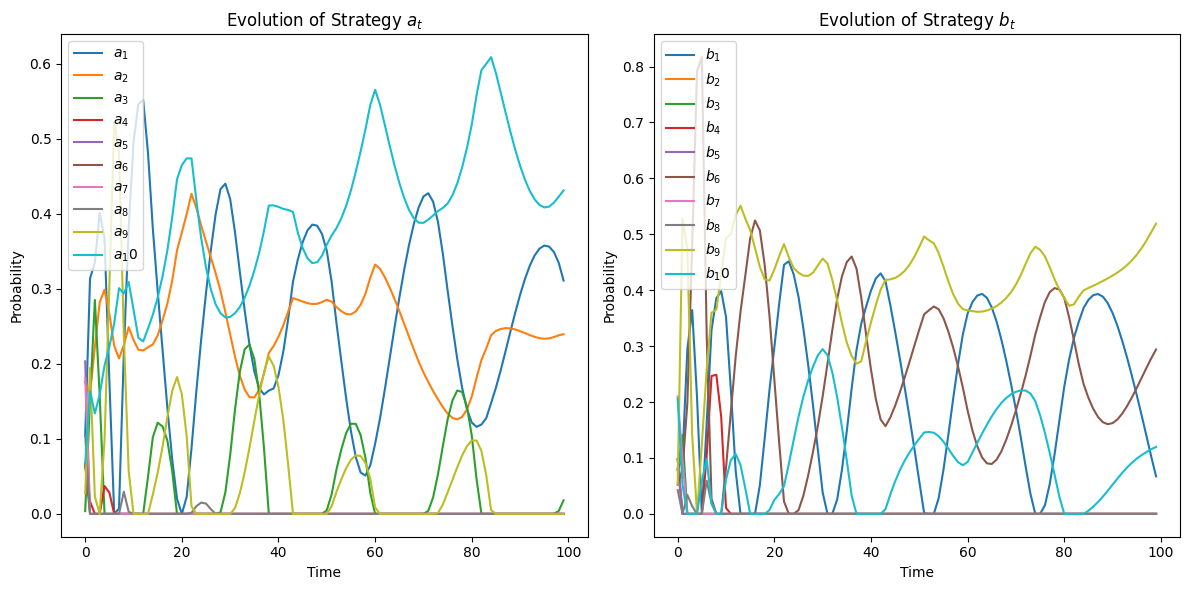

In [ ]:
T_max = 100
n = 10  # Dimension of the game

np.random.seed(0)
A = np.random.randn(n, n)  # Payoff matrix

# Initialization of strategies in the simplex
a_0 = np.random.dirichlet(np.ones(n), size=1).flatten()
b_0 = np.random.dirichlet(np.ones(n), size=1).flatten()

a = np.zeros((T_max, n))
b = np.zeros((T_max, n))
x = np.zeros(n)
w = np.zeros(n)
a[0, :] = a_0
b[0, :] = b_0

# Game dynamics
for t in range(1, T_max):
    x = np.maximum(x + A @ b[t-1] - np.dot(a[t-1], A @ b[t-1]) * np.ones(n), 0)
    w = np.maximum(w + np.dot(a[t-1], A @ b[t-1]) * np.ones(n) - A.T @ a[t-1], 0)

    a[t] = x / np.linalg.norm(x, 1) if np.linalg.norm(x, 1) > 0 else a[0]
    b[t] = w / np.linalg.norm(w, 1) if np.linalg.norm(w, 1) > 0 else b[0]


plt.figure(figsize=(12, 6))

for i in range(n):
    plt.subplot(1, 2, 1)
    plt.plot(a[:, i], label=f'$a_{i+1}$')
    plt.title('Evolution of Strategy $a_t$')
    plt.xlabel('Time')
    plt.ylabel('Probability')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(b[:, i], label=f'$b_{i+1}$')
    plt.title('Evolution of Strategy $b_t$')
    plt.xlabel('Time')
    plt.ylabel('Probability')
    plt.legend()

plt.tight_layout()
plt.show()
